# Project Proposal: Crime Rates in Kitsilano & Hastings-Sunrise

## Introduction

Vancouver has always been deemed a relatively safe city; however, crime rates have been increasing in recent years.[2] Though Vancouver is a safe place to live, some neighbourhoods have significantly higher crime rates than other areas. 

In this project, we want to compare the mean crime rates in Kitsilano and Hastings-Sunrise from 2003 to 2022. We will be performing a t-test to compare the difference in mean crime rates over the past 20 years of the two neighbourhoods. The dataset we selected, provided by GeoDASH, is extracted from the PRIME BC Police Records Management System (RMS) and it contains crime data on a year-by-year basis which began in 2003.[1] This data also uses the ‘All Offence’ reporting method along with the condition of ‘Founded’ incidents, which means that the incidents were determined after the police investigation that the violation had occurred.[1]


The variables included in this dataset are:

1. <b>TYPE:</b> The type of crime activities
2. <b>YEAR:</b>  Indicates the year when the reported crime activity occurred 
3. <b>MONTH:</b>  Indicates the month when the reported crime activity occurred 
4. <b>DAY:</b>  Indicates the day of the month when the reported crime activity occurred 
5. <b>HOUR:</b>  Indicates the hour when the reported crime activity occurred 
6. <b>MINUTE:</b>  Indicates the minute when the reported crime activity occurred 
7. <b>HUNDRED_BLOCK:</b>  Generalised location of the reported crime activity
8. <b>NEIGHBOURHOOD:</b>  The VPD uses the Statistics Canada definition of neighbourhoods within municipalities.
9. <b>X:</b>  Coordinate projected in UTM Zone 10
10. <b>Y:</b>  Coordinate projected in UTM Zone 10


## Preliminary Results

In [2]:
library(tidyverse)
library(repr)
library(digest)
library(infer)
library(gridExtra)
library(taxyvr)
library(cowplot)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




First, we read the data from the web into R.

In [3]:
crime_data <- read_csv("https://raw.githubusercontent.com/Git-Over-Here/STAT-201-Group-Project/main/combined.csv")

# Display the first 6 rows of raw data
head(crime_data)

#print("The total number of crimes observed is: ") nrow(crime_data)

Warning message:
“One or more parsing issues, see `problems()` for details”
Rows: 70996 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): TYPE, HUNDRED_BLOCK, NEIGHBOURHOOD
dbl (7): YEAR, MONTH, DAY, HOUR, MINUTE, X, Y

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
Break and Enter Commercial,2018,5,16,17,0,10XX BOUNDARY RD,Hastings-Sunrise,498275.6,5458125
Break and Enter Commercial,2018,2,27,21,40,11XX ROSSLAND ST,Hastings-Sunrise,496692.0,5458066
Break and Enter Commercial,2012,9,25,22,33,13XX BOUNDARY RD,Hastings-Sunrise,498274.2,5457717
Break and Enter Commercial,2006,5,12,20,0,13XX BOUNDARY RD,Hastings-Sunrise,498274.3,5457739
Break and Enter Commercial,2006,5,13,20,58,13XX BOUNDARY RD,Hastings-Sunrise,498274.3,5457739
Break and Enter Commercial,2006,7,28,18,0,13XX BOUNDARY RD,Hastings-Sunrise,498274.3,5457739


Then, we clean the data by filtering out NAs in the dataset and selecting the columns that we are interested in, which are "TYPE", "YEAR" and "NEIGHBOURHOOD".

In [4]:
# Filter out the NAs in the dataset and select the columns we are interested in
filtered_crime <- crime_data %>%
    filter(!is.na(YEAR), !is.na(TYPE), !is.na(NEIGHBOURHOOD)) %>%
    select(TYPE, YEAR, NEIGHBOURHOOD)

# Display first 6 rows of the filtered data
head(filtered_crime)

TYPE,YEAR,NEIGHBOURHOOD
<chr>,<dbl>,<chr>
Break and Enter Commercial,2018,Hastings-Sunrise
Break and Enter Commercial,2018,Hastings-Sunrise
Break and Enter Commercial,2012,Hastings-Sunrise
Break and Enter Commercial,2006,Hastings-Sunrise
Break and Enter Commercial,2006,Hastings-Sunrise
Break and Enter Commercial,2006,Hastings-Sunrise


Here, we group the data by neighbourhood and find the number of crimes for each year and mean crime rate of Kitsilano and Hastings-Sunrise from 2003 to 2022. 

In [5]:
# Using the filtered data, find the number of crimes in each year
crime_data <- filtered_crime %>%
    group_by(YEAR, NEIGHBOURHOOD) %>%
    summarize(n = n())

# Using the filtered data, find the number of crimes in each year and find the mean crime rate
crime_data_mean_summary <- filtered_crime %>%
    group_by(YEAR, NEIGHBOURHOOD) %>%
    summarize(n = n()) %>%
    group_by(NEIGHBOURHOOD) %>%
    summarize(mean = mean(n))

crime_data_mean_summary

`summarise()` has grouped output by 'YEAR'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'YEAR'. You can override using the
`.groups` argument.


NEIGHBOURHOOD,mean
<chr>,<dbl>
Hastings-Sunrise,1466.85
Kitsilano,2082.90


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


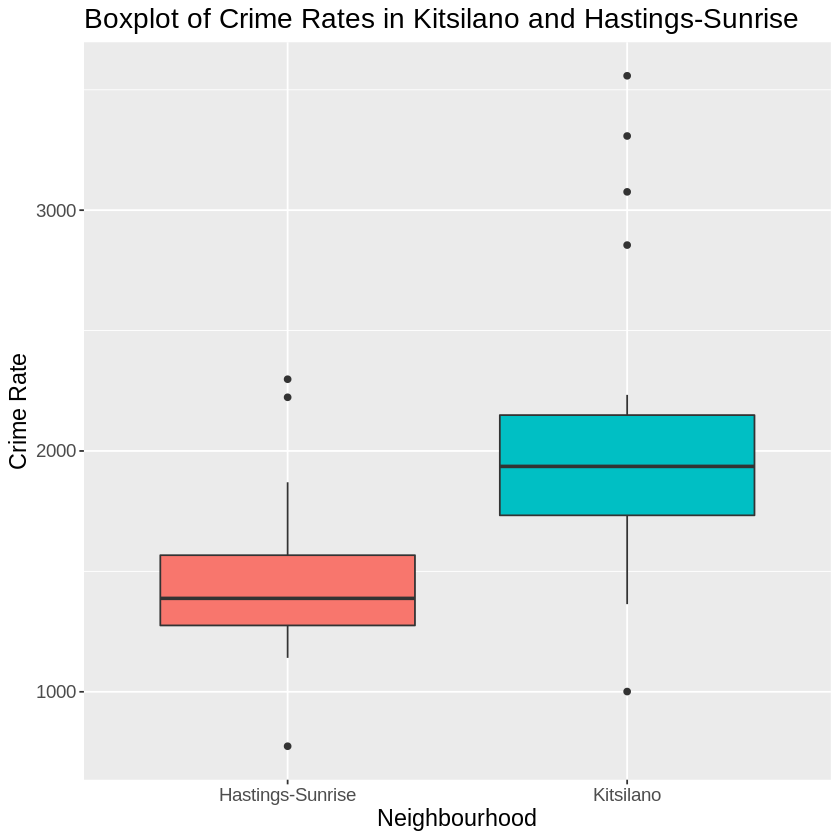

In [6]:
# Plot a boxplot of the crime rates in Kitsilano and Hastings-Sunrise
crime_graph <- crime_data %>% 
    ggplot() +
    geom_boxplot(aes(x = NEIGHBOURHOOD, y = n, fill = NEIGHBOURHOOD)) +
    theme(text = element_text(size = 14)) +
    ggtitle("Boxplot of Crime Rates in Kitsilano and Hastings-Sunrise") + 
    xlab("Neighbourhood") + 
    ylab("Crime Rate") + 
    guides(fill = FALSE)
crime_graph

Next, we will plot density curves for yearly crime rates in Kitsilano (Blue) and also in Hastings-Sunrise (Red).

In [7]:
# Plot density curves for yearly crime rates in Kitsilano and Hastings-Sunrise
crime_data_distribution <-
    crime_data %>%
    ggplot() +
    geom_density(aes(x = n, colour = NEIGHBOURHOOD)) +
    theme(text = element_text(size = 14)) +
    ggtitle("Distribution of Crime Rates in Kitsilano and Hastings-Sunrise") + 
    xlab("Yearly crime rate") + 
    ylab("Density")

options(repr.plot.length = 4, repr.plot.width = 10)

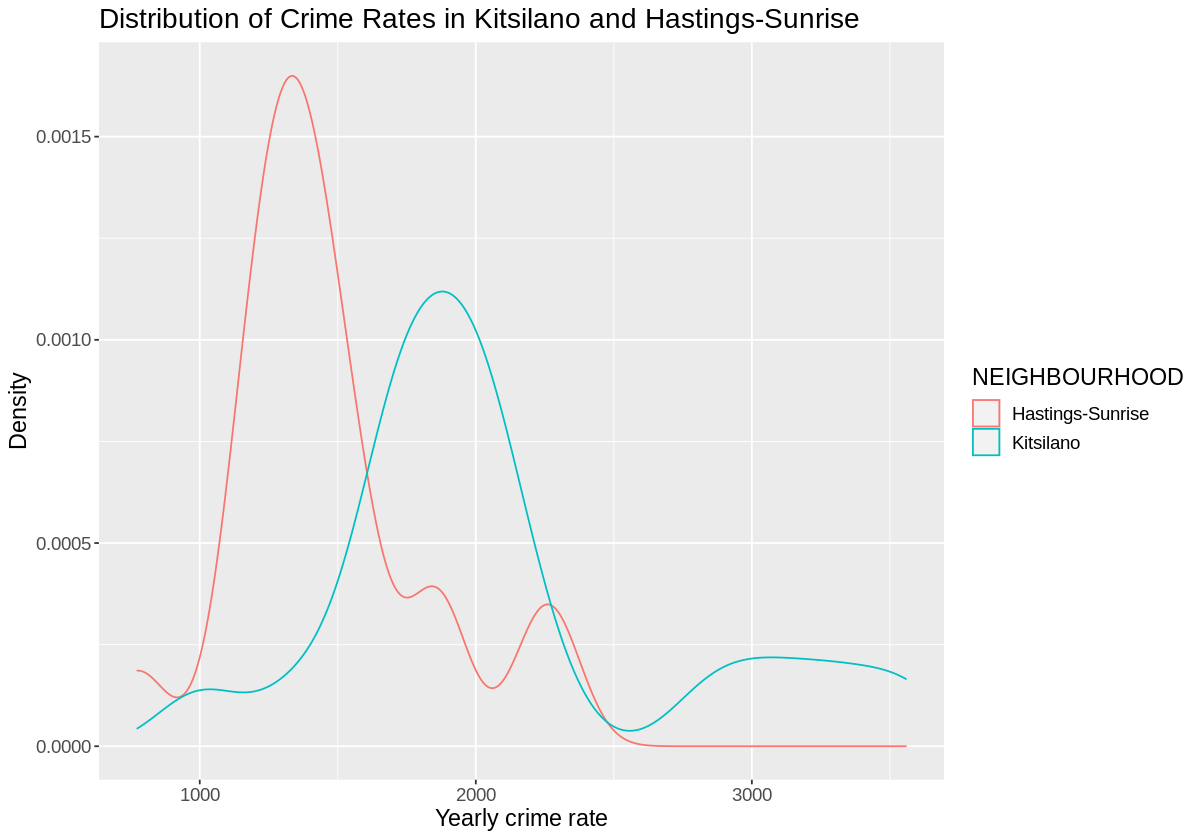

In [8]:
crime_data_distribution

Now, we will plot the distribution in the difference in yearly crime rates. To do so, we must first calculate this difference, by grouping the filtered data by year, calculating the crime rate for each neighbourhood, and taking the difference.

In [13]:
# Calculating difference by grouping filtered data by year, calculating the crime rate for each neighbourhood, and taking the difference.
crime_data_difference <- filtered_crime %>%
    group_by(YEAR) %>%
    summarise(Kitsilano = sum(NEIGHBOURHOOD == 'Kitsilano'),
              Hastings_Sunrise = sum(NEIGHBOURHOOD == 'Hastings-Sunrise'),
             Difference = Kitsilano - Hastings_Sunrise)

In [10]:
head(crime_data_difference)

YEAR,Kitsilano,Hastings_Sunrise,Difference
<dbl>,<int>,<int>,<int>
2003,3558,2223,1335
2004,3308,2298,1010
2005,3076,1870,1206
2006,2855,1851,1004
2007,2233,1549,684
2008,2010,1450,560


In [15]:
# Now we can use crime_data_difference to plot the distribution of differences
difference_distribution <-
    crime_data_difference %>%
    ggplot() +
    geom_density(aes(x = Difference)) +
    theme(text = element_text(size = 14)) +
    ggtitle("Distribution of Difference of Crime Rates Between Kitsilano and Hastings-Sunrise") + 
    xlab("Yearly crime rate") + 
    ylab("Density")

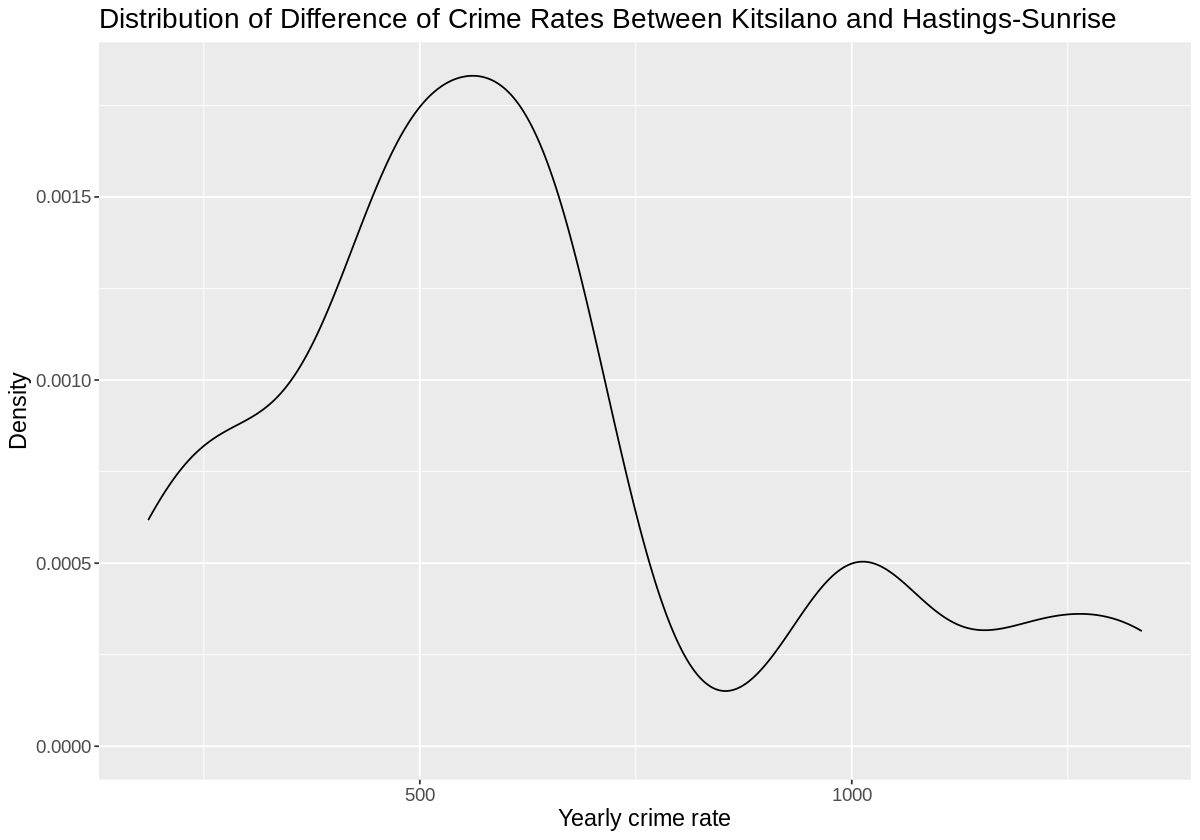

In [12]:
difference_distribution

## Methods: Plan

The data for this project has been obtained from the VPD, meaning it is a very reliable data set. Since this data set only contains crimes that were reported and crimes that were deemed "found" by the police, we can treat this as a sample of all crimes.

Since this is a sample of all crimes, the boxplot gives us a good indication of the trend of overall crime rates, but we cannot determine that there truly is a difference in the increase in crime rates between both neighbourhoods.

To determine if there is truly a difference in the yearly crime rate over the past 20 years we will use a two-sided paired t-test to test the hypothesis: 
$$H_0: \mu_{\text{d}} = 0$$ $$H_1: \mu_{\text{d}} \neq 0$$

using the following test statistic:
$$
T = \frac{\bar{d} - \mu_{\text{d}}}{\sqrt{\frac{s^2_{\text{d}}}{n}}}
$$

where $\bar{x}_{\text{d}}$ is the sample mean of difference in crime rates from 2003 to 2022 between Kitsilano and Hastings-Sunrise, $s^2_{\text{d}}$ is the sample variance for the difference between Kitsilano and Hastings-Sunrise, and $n$ is the sample size.

Since our data is bell-shaped and approximately normal, we can use a student's t-distribution with n-1 degrees of freedom, to calculate a confidence interval for the test-statistic assuming H<sub>0</sub> is true, at a 95% confidence level. If our test statistic T is not within this interval, we will be 95% confident that there is a difference between the average yearly crime rates from 2003 to 2022 between Kitsilano and Hastings-Sunrise.

From the significant difference seen in our preliminary analysis, we are expecting to find that there is truly a difference in mean yearly crime rates between the two neighbourhoods. These findings could help future home buyers, or renters decide where to live, as well as help police allocate resources more efficiently to reduce the overall crime rate in Vancouver.

In the future, this analysis could be extended to all different neighbourhoods in Vancouver. We might also want to fit a regression model to our data set to predict future crime rates and reapply our test to see if we can expect crime rates to equalize or not.

## References

[1] (2022) VPD open data. Available at: https://geodash.vpd.ca/opendata/# (Accessed: October 25, 2022). 

[2] Daflos, P. (2022) Is Vancouver 'deteriorating'? how public safety is being debated in the lead-up to the election, British Columbia. CTV News. Available at: https://bc.ctvnews.ca/is-vancouver-deteriorating-how-public-safety-is-being-debated-in-the-lead-up-to-the-election-1.6103614 (Accessed: November 2, 2022). 